A few galaxies cutouts in the Virgo filament sample feature one central galaxy with one or more off-center foreground galaxies (i.e., cutouts that contain 2+ sersic objects). For a fraction of these cutouts, GALFIT incorrectly identifies the galaxy to model as the off-centered lurker. To try to remedy this error, I will instead demonstrate a means of fitting 2+ sersic objects simultaneously. 

Requirement --> input file for 2 sersic-object cutout must contain three Objects total: sersic 1, sersic 2, and sky. Edit the input file to reflect the presence of two sersic objects.

Steps up until this notebook:

1. run galfit on entire sample once, without convolution

2. run galfit again on entire sample, WITH convolution

3. inspect galaxies for any 2+ sersic-object profiles

4. if yes, open .fits of WISE image cutout with DS9, fit center of off-centered galaxy (manipulate scale and zoom to REALLY identify the galaxy center!)

5. open [galaxy_prefix]-unwise-w3-galfit-input-1Comp, copy "Object Number: 1" entry and paste underneath. Change Object Number to 2, edit x, y position according to finding with DS9

6. repeat if there is a third, fourth, or even fifth object. Or sixth, seventh, ...

7. Change sky to Object Number 3

8. save


In [1]:
#MESSIER060

In [121]:
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.table import Table
from astropy.wcs import WCS
from astropy.io import fits
from astropy.io import ascii
from scipy.stats import scoreatpercentile
from astropy.visualization import simple_norm

In [64]:
homedir = os.getenv("HOME")
vfmain = Table.read(homedir+'/github/research/sample_main_two.fits')
os.chdir(homedir+'/github/WISE_232_psf')
%run ~/github/research/run_galfit.py

In [101]:
#find "test" galaxy with off-center model, MESSIER060

for i in range(0,len(vfmain)):
    if vfmain['objname'][i] == 'NGC4649':
        print(i)

158


In [ ]:
#isolate array of two galaxies, since my routine requires more than one galaxy as input :}
#concentrate on only the first mosaic, if you would.

vf = vfmain[158]

In [57]:
vf

VFID,RA,DEC,vr,radius,radius_flag,objname,NSAID,NSAIDV0,AGC,NEDname,HLflag,NSAflag,NSAV0flag,A100flag,prefix,COflag,Z0MGSflag,Steerflag,unwiseflag
,,,,arcsec,,,,,,,,,,,,,,,
bytes8,float32,float32,float32,float32,bool,bytes28,int32,int32,int64,bytes30,bool,bool,bool,bool,bytes38,bool,bool,bool,bool
VFID4957,190.9165,11.552707,1107.3,203.29245,True,NGC4649,0,142078,0,MESSIER 060,True,False,True,False,VFID4957-MESSIER060,False,True,True,False
VFID4958,261.7978,11.543621,2764.8,103.30498,True,NGC6368,0,0,0,NGC 6368,True,False,False,False,VFID4958-NGC6368,False,True,True,False


In [68]:
!galfit VFID4957-MESSIER060-unwise-w3-galfit.input.1Comp

#results append fit.log, it seems. Two sersic objects, one sky! Woohoo!
#will have to explicitly run/manipulate Rose's code to display result as a mosaic?
#filename (of two-object fit --> MESSIER060)


GALFIT Version 3.0.5 -- Apr. 23, 2013


Your options are: 
  [ ] Enter parameter number/letter followed by value(s)
  [M number] Modify component number parameters 
  [N] Add new component 
  [R] Redisplay the parameter menu 
  [T] Read in initial parameter template file 
  [X number] Delete component number 
  [Q] Quit menu and go on to fitting 





#  Input menu file: VFID4957-MESSIER060-unwise-w3-galfit.input.1Comp


# IMAGE and GALFIT CONTROL PARAMETERS
A) /Users/k215c316/github/unwise_fixed/VFID4957/unwise-VFID4957-w3-img-m.fits      # Input data image (FITS file)
B) VFID4957-MESSIER060-unwise-w3-1Comp-galfit-out.fits      # Output data image block
C) /Users/k215c316/github/unwise_fixed/VFID4957/unwise-VFID4957-w3-std-m.fits      # Sigma image name (made from data if blank or "none") 
D)                     # Input PSF image and (optional) diffusion kernel
E) 1                   # PSF fine sampling factor relative to data 
F) none                # Bad pixel mask (FITS image or A


Iteration : 13    Chi2nu: 1.444e+00     dChi2/Chi2: -8.35e-06   alamda: 1e-09     
 sersic    : (  250.47,   250.64)    4.84     19.53    2.34    0.88   -87.31
 sersic    : (  290.47,   289.23)    4.35     11.60    1.06    0.88   -69.68
 sky       : [250.50, 250.50]    -8.25  [0.00e+00]  [0.00e+00]
COUNTDOWN = 9 

Iteration : 14    Chi2nu: 1.444e+00     dChi2/Chi2: -1.18e-06   alamda: 1e-10     
 sersic    : (  250.47,   250.64)    4.83     19.62    2.34    0.88   -87.33
 sersic    : (  290.47,   289.23)    4.35     11.59    1.06    0.88   -69.68
 sky       : [250.50, 250.50]    -8.39  [0.00e+00]  [0.00e+00]
COUNTDOWN = 8 

Iteration : 15    Chi2nu: 1.444e+00     dChi2/Chi2: -1.48e-07   alamda: 1e-11     
 sersic    : (  250.47,   250.64)    4.83     19.66    2.35    0.88   -87.34
 sersic    : (  290.47,   289.23)    4.35     11.59    1.06    0.88   -69.68
 sky       : [250.50, 250.50]    -8.44  [0.00e+00]  [0.00e+00]
COUNTDOWN = 7 

Iteration : 16    Chi2nu: 1.444e+00     dChi2/Chi2:

In [118]:
#from above, output data image block is the following (I assume this overwrites the initial, 
#one-sersic-object fits output):

out = 'VFID4957-MESSIER060-unwise-w3-1Comp-galfit-out.fits'
im = fits.open(out)
im.info()

Filename: VFID4957-MESSIER060-unwise-w3-1Comp-galfit-out.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (500, 500)   float32   
  1                1 ImageHDU        38   (500, 500)   float32   
  2                1 ImageHDU        52   (500, 500)   float32   
  3                1 ImageHDU         6   (500, 500)   float32   


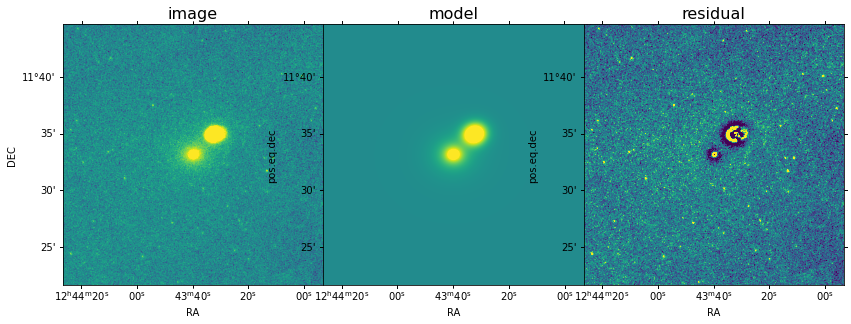

In [126]:
#routine below is Rose's code...

percentile1=.5
percentile2=99.5
p1residual=5
p2residual=99
cmap='viridis'

image,h = fits.getdata(out,1,header=True)
model = fits.getdata(out,2)
residual = fits.getdata(out,3)

wcs = WCS(h)
images = [image,model,residual]
titles = ['image','model','residual']

v1 = [scoreatpercentile(image,percentile1),
    scoreatpercentile(image,percentile1),
    scoreatpercentile(residual,p1residual)]
v2 = [scoreatpercentile(image,percentile2),
    scoreatpercentile(image,percentile2),
    scoreatpercentile(residual,p2residual)]
norms = [simple_norm(image,'asinh',max_percent=percentile2),
        simple_norm(image,'asinh',max_percent=percentile2),
        simple_norm(residual,'linear',max_percent=p2residual)]
               
plt.figure(figsize=(14,6))
plt.subplots_adjust(wspace=.0)
for i,im in enumerate(images): 
    plt.subplot(1,3,i+1,projection=wcs)
    plt.imshow(im,origin='lower',cmap=cmap,vmin=v1[i],vmax=v2[i],norm=norms[i])
    plt.xlabel('RA')
    if i == 0:
        plt.ylabel('DEC')
    else:
        ax = plt.gca()
        ax.set_yticks([])
    plt.title(titles[i],fontsize=16)
        
plt.savefig('VFID4957-MESSIER060-unwise-w3-1Comp-galfit-out.png')